In [3]:
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import eva as evaluation 
sys.path.append("../Preprocessing")
import Prep as prep

In [4]:
label = np.loadtxt('../Data/label.csv', delimiter=',', skiprows= 0)
train = np.genfromtxt('../Data/train.csv', delimiter=',', skip_header = True)
print(train.shape)

In [ ]:
import seaborn as sns
import pandas as pd
df = pd.read_csv('../Data/train.csv', delimiter=',')
sns.heatmap(df.isnull(), cmap="YlGnBu", annot=True, fmt="d")

In [5]:
train = prep.missing_point(train)

In [6]:
x_data, label = prep.mutual_info(train, label)
print(x_data.shape)

(76878, 51)


In [7]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [8]:
class_weights = prep.get_weight(y_train)

In [9]:
sample_weight = prep.get_sample('balanced',y_train)

In [10]:
X_train = prep.StdScaler(X_train)
X_test = prep.StdScaler(X_test)

In [11]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 51)


In [12]:
class_weight = {0: class_weights[0], 1: class_weights[1]}

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc_train =  0.7533386520517534
              precision    recall  f1-score   support

     class 1       0.96      0.76      0.85     53597
     class 2       0.17      0.63      0.27      4061

   micro avg       0.75      0.75      0.75     57658
   macro avg       0.57      0.70      0.56     57658
weighted avg       0.91      0.75      0.81     57658

auc =  0.6970895827547196
acc_test =  0.7215920915712799
              precision    recall  f1-score   support

     class 1       0.96      0.73      0.83     17704
     class 2       0.16      0.60      0.26      1516

   micro avg       0.72      0.72      0.72     19220
   macro avg       0.56      0.67      0.54     19220
weighted avg       0.89      0.72      0.78     19220

f1 score = 0.7835566440753728


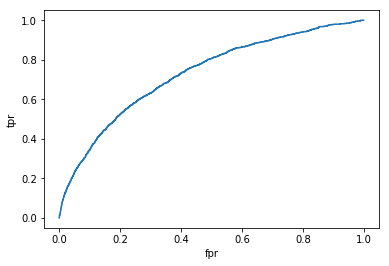

In [13]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.9290644836796281
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53597
     class 2       0.44      0.02      0.05      4061

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.68      0.51      0.50     57658
weighted avg       0.90      0.93      0.90     57658

auc =  0.5109950192967694
acc_test =  0.9210718002081165
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17704
     class 2       0.49      0.02      0.05      1516

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.71      0.51      0.50     19220
weighted avg       0.89      0.92      0.89     19220

f1 score = 0.8868716534392506


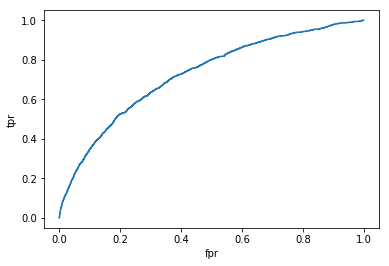

In [16]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.7792674043497867
              precision    recall  f1-score   support

     class 1       0.97      0.79      0.87     53597
     class 2       0.20      0.69      0.31      4061

   micro avg       0.78      0.78      0.78     57658
   macro avg       0.58      0.74      0.59     57658
weighted avg       0.92      0.78      0.83     57658

auc =  0.737208764634012
acc_test =  0.7508324661810614
              precision    recall  f1-score   support

     class 1       0.95      0.77      0.85     17704
     class 2       0.17      0.55      0.26      1516

   micro avg       0.75      0.75      0.75     19220
   macro avg       0.56      0.66      0.55     19220
weighted avg       0.89      0.75      0.80     19220

f1 score = 0.8035361709437118


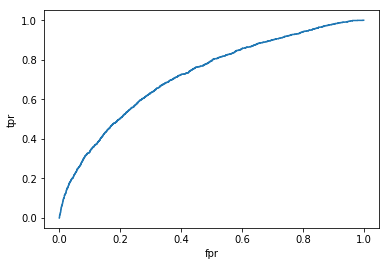

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

In [18]:
x_data, label = prep.ExtraTrees(train, label)
print(x_data.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(76878, 227)


In [19]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [20]:
class_weights = prep.get_weight(y_train)
sample_weight = prep.get_sample('balanced',y_train)

In [21]:
X_train = prep.StdScaler(X_train)
X_test = prep.StdScaler(X_test)

In [22]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 227)


In [23]:
class_weight = {0: class_weights[0], 1: class_weights[1]}

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc_train =  0.7569981615734157
              precision    recall  f1-score   support

     class 1       0.97      0.76      0.85     53604
     class 2       0.17      0.65      0.27      4054

   micro avg       0.76      0.76      0.76     57658
   macro avg       0.57      0.71      0.56     57658
weighted avg       0.91      0.76      0.81     57658

auc =  0.7086738183099164
acc_test =  0.7274193548387097
              precision    recall  f1-score   support

     class 1       0.96      0.74      0.83     17666
     class 2       0.17      0.63      0.27      1554

   micro avg       0.73      0.73      0.73     19220
   macro avg       0.57      0.68      0.55     19220
weighted avg       0.89      0.73      0.79     19220

f1 score = 0.7870288111760856


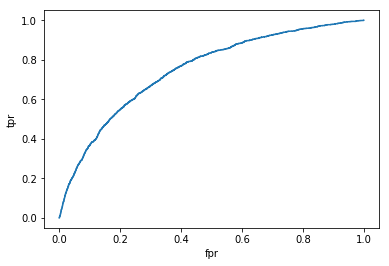

In [24]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.9289257345034514
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53604
     class 2       0.44      0.04      0.08      4054

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.69      0.52      0.52     57658
weighted avg       0.90      0.93      0.90     57658

auc =  0.5187428119020194
acc_test =  0.9185744016649323
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17666
     class 2       0.44      0.03      0.05      1554

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.68      0.51      0.51     19220
weighted avg       0.88      0.92      0.88     19220

f1 score = 0.8843485449963208


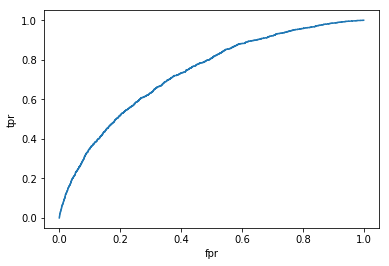

In [25]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.8212043428492143
              precision    recall  f1-score   support

     class 1       0.97      0.83      0.90     53604
     class 2       0.24      0.69      0.35      4054

   micro avg       0.82      0.82      0.82     57658
   macro avg       0.60      0.76      0.62     57658
weighted avg       0.92      0.82      0.86     57658

auc =  0.7621300378624852
acc_test =  0.7892819979188346
              precision    recall  f1-score   support

     class 1       0.95      0.82      0.88     17666
     class 2       0.19      0.47      0.27      1554

   micro avg       0.79      0.79      0.79     19220
   macro avg       0.57      0.65      0.57     19220
weighted avg       0.88      0.79      0.83     19220

f1 score = 0.8276435980920523


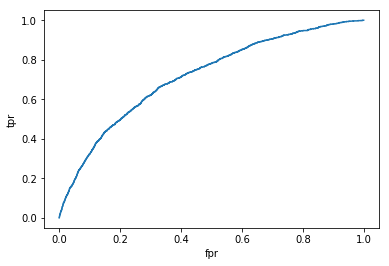

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

In [27]:
x_data, label = prep.fclassif(train, label)
print(x_data.shape)

(76878, 51)


/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 13 127 129 133 234 318 320 325 355 357 358 368 382 397] are constant.
  UserWarning)
/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
x_data, label = prep.fclassif(train, label)
print(x_data.shape)

In [28]:
X_train, X_test, y_train, y_test = prep.split_train_test(x_data, label)

In [29]:
class_weights = prep.get_weight(y_train)
sample_weight = prep.get_sample('balanced',y_train)

In [30]:
X_train = prep.StdScaler(X_train)
X_test = prep.StdScaler(X_test)

In [31]:
X_train, y_train = prep.Outlier(X_train, y_train)
print(X_train.shape)

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


(57658, 51)


In [32]:
class_weight = {0: class_weights[0], 1: class_weights[1]}

/Users/yuanshuang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


acc_train =  0.7536508376981512
              precision    recall  f1-score   support

     class 1       0.96      0.76      0.85     53613
     class 2       0.17      0.63      0.26      4045

   micro avg       0.75      0.75      0.75     57658
   macro avg       0.57      0.69      0.56     57658
weighted avg       0.91      0.75      0.81     57658

auc =  0.6949643483743555
acc_test =  0.7235171696149844
              precision    recall  f1-score   support

     class 1       0.96      0.73      0.83     17713
     class 2       0.16      0.62      0.26      1507

   micro avg       0.72      0.72      0.72     19220
   macro avg       0.56      0.68      0.54     19220
weighted avg       0.90      0.72      0.79     19220

f1 score = 0.7852985059236367


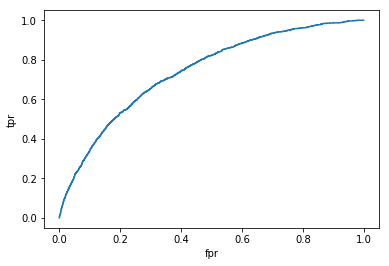

In [33]:
clf = LogisticRegression(class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.9296194803843352
              precision    recall  f1-score   support

     class 1       0.93      1.00      0.96     53613
     class 2       0.47      0.03      0.05      4045

   micro avg       0.93      0.93      0.93     57658
   macro avg       0.70      0.51      0.51     57658
weighted avg       0.90      0.93      0.90     57658

auc =  0.512335640233743
acc_test =  0.9211758584807492
              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96     17713
     class 2       0.45      0.02      0.05      1507

   micro avg       0.92      0.92      0.92     19220
   macro avg       0.69      0.51      0.50     19220
weighted avg       0.89      0.92      0.89     19220

f1 score = 0.8872633702366965


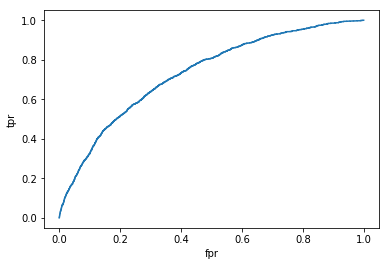

In [34]:
clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.7)
clf.fit(X_train, y_train, sample_weight)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)

acc_train =  0.7987443199556002
              precision    recall  f1-score   support

     class 1       0.97      0.81      0.88     53613
     class 2       0.21      0.69      0.32      4045

   micro avg       0.80      0.80      0.80     57658
   macro avg       0.59      0.75      0.60     57658
weighted avg       0.92      0.80      0.84     57658

auc =  0.7469830401307802
acc_test =  0.7736732570239334
              precision    recall  f1-score   support

     class 1       0.95      0.80      0.87     17713
     class 2       0.17      0.50      0.26      1507

   micro avg       0.77      0.77      0.77     19220
   macro avg       0.56      0.65      0.56     19220
weighted avg       0.89      0.77      0.82     19220

f1 score = 0.8187228580471567


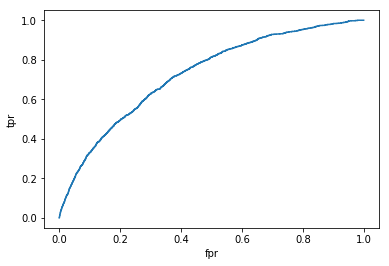

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=32, max_depth=8,class_weight=class_weight).fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_prob_pred_test = clf.predict_proba(X_test)
evaluation.EVA(y_pred_train,y_train,y_pred_test,y_prob_pred_test,y_test)